In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

pd.options.mode.chained_assignment = None
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

In [3]:
def plot_init():
    return plt.figure(figsize=(14,8))

In [4]:
portfolio=pd.read_json("portfolio.json",lines=True)
profile=pd.read_json("profile.json", lines=True)
transcript=pd.read_json("transcript.json", lines=True)

Cleaning


portfolio.json

This file contains offer ids and meta data about each offer (duration, type, etc.)


id (string) - offer id

offer_type (string) - type of offer i.e. 
BOGO, discount, informational.

difficulty (int) - minimum required spend to complete an offer.

reward (int) - reward given for completing an offer.

duration (int) - time for offer to be open, in days.

channels (list of strings)

In [5]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [6]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
portfolio["reward"].unique()

array([10,  0,  5,  3,  2], dtype=int64)

In [8]:
portfolio["channels"]

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

In [9]:
portfolio["difficulty"].unique()

array([10,  0,  5, 20,  7], dtype=int64)

In [10]:
portfolio["duration"].unique()

array([ 7,  5,  4, 10,  3], dtype=int64)

In [11]:
portfolio["offer_type"].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [12]:
portfolio["id"].unique()

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

profile.json

This file contains the demographic data for each customer.

age (int) - age of the customer.

becamememberon (int) - date when customer created an app account.

gender (string) - gender of the customer (note some entries contain 'O' for other rather than M or F).

id (string) - customer id.

income (float) - customer's income.

In [13]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [14]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
profile[profile["gender"].isna()]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [16]:
profile.isna().sum()/len(profile)

gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

In [17]:
profile=profile.dropna()

In [18]:
profile["gender"].unique()

array(['F', 'M', 'O'], dtype=object)

In [19]:
profile["age"].unique()

array([ 55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,  78,
        42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,  54,
        39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,  27,
        73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,  83,
        43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,  25,
        37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,  93,
        91,  92,  98, 101,  97,  99], dtype=int64)

In [20]:
sorted(profile["id"].unique())[:10]
#sorting to check for unvalid ids


['0009655768c64bdeb2e877511632db8f',
 '0011e0d4e6b944f998e987f904e8c1e5',
 '0020c2b971eb4e9188eac86d93036a77',
 '0020ccbbb6d84e358d3414a3ff76cffd',
 '003d66b6608740288d6cc97a6903f4f0',
 '00426fe3ffde4c6b9cb9ad6d077a13ea',
 '004b041fbfe44859945daa2c7f79ee64',
 '004c5799adbf42868b9cff0396190900',
 '005500a7188546ff8a767329a2f7c76a',
 '0056df74b63b4298809f0b375a304cf4']

In [21]:
sorted(profile["became_member_on"].unique())[:10]

[20130729,
 20130730,
 20130731,
 20130801,
 20130802,
 20130803,
 20130804,
 20130805,
 20130806,
 20130807]

In [22]:
sorted(profile["income"].unique())[:10]

[30000.0,
 31000.0,
 32000.0,
 33000.0,
 34000.0,
 35000.0,
 36000.0,
 37000.0,
 38000.0,
 39000.0]

transcript.json

This file contains records for transactions, offers received, offers viewed, and offers completed.

event (str) - record description (ie transaction, offer received, offer viewed, etc.)

person (str) - customer id.

time (int) - time in hours since the start of the test. The data begins at time t=0.

value - (dict of strings) - either an offer id or transaction amount depending on the record.

In [23]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [24]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [25]:
sorted(transcript["person"].unique())[:10]

['0009655768c64bdeb2e877511632db8f',
 '00116118485d4dfda04fdbaba9a87b5c',
 '0011e0d4e6b944f998e987f904e8c1e5',
 '0020c2b971eb4e9188eac86d93036a77',
 '0020ccbbb6d84e358d3414a3ff76cffd',
 '003d66b6608740288d6cc97a6903f4f0',
 '00426fe3ffde4c6b9cb9ad6d077a13ea',
 '004b041fbfe44859945daa2c7f79ee64',
 '004c5799adbf42868b9cff0396190900',
 '005500a7188546ff8a767329a2f7c76a']

In [26]:
transcript["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [27]:
transcript["time"].unique()


array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714], dtype=int64)

Exploratory Data Analysis (EDA)

Initial Feature Analysis

In [28]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


Text(0.5, 0, 'Income')

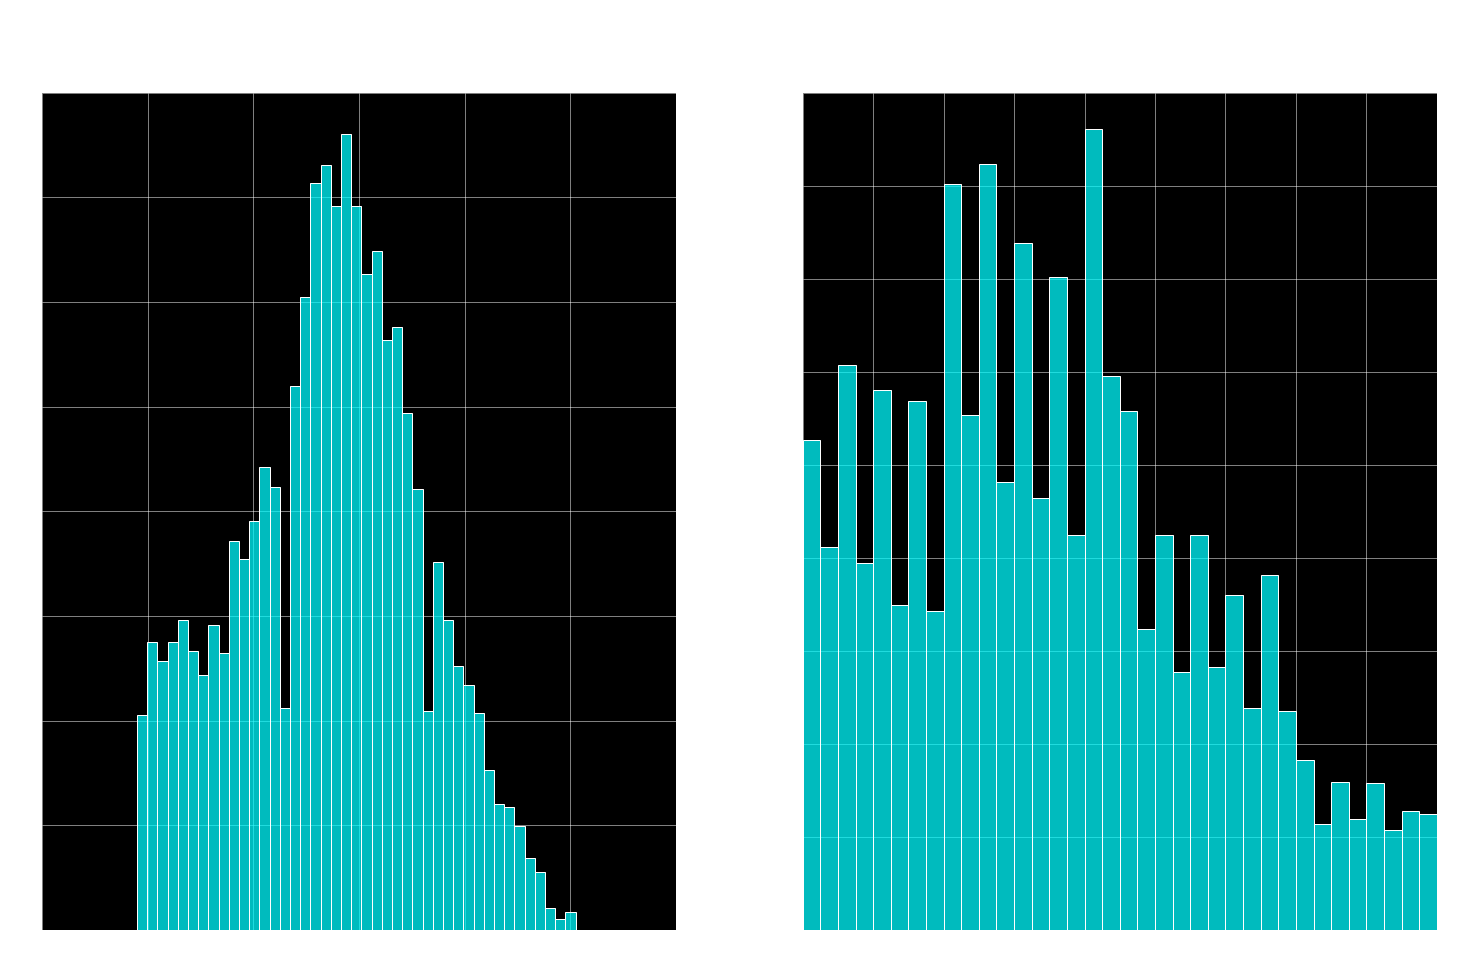

In [29]:
fig,axs=plt.subplots(1,2,figsize=(25,15))
fig.suptitle("Distribution Histograms of Profile Features", size=23)
f1=sns.histplot(profile["age"],ax=axs[0],color="#00fbff")
f1.set_xlabel("Age",size=20)
f2=sns.histplot(profile["income"],ax=axs[1],color="#00fbff")
f2.set_xlabel("Income",size=20)

Text(0.5, 0, 'Income')

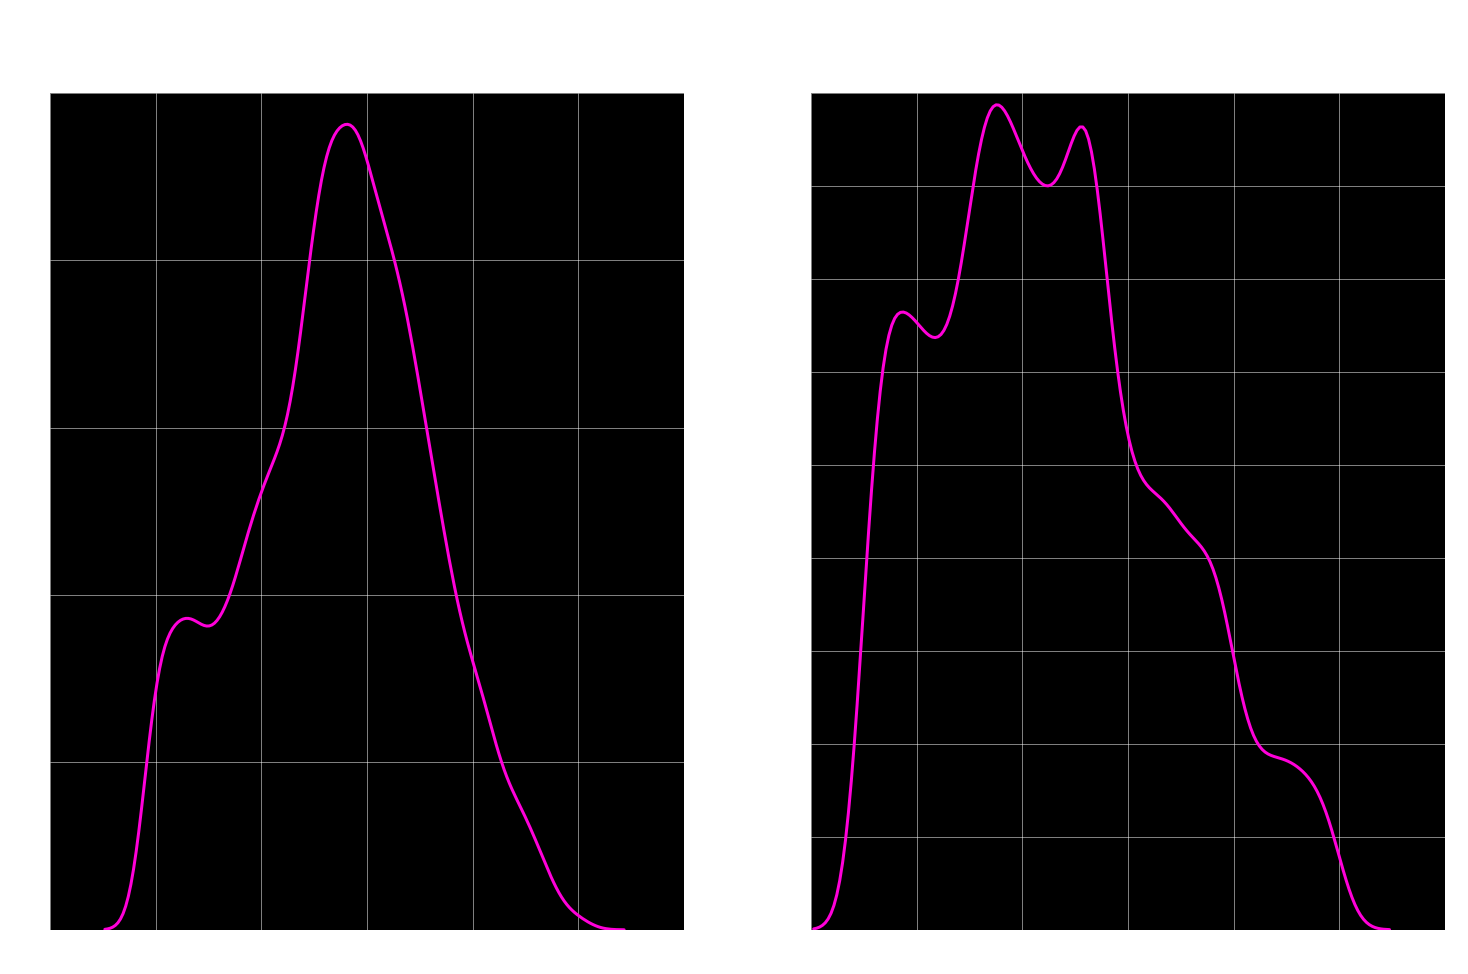

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
fig.suptitle("Kernel Density Estimates of Profile Features", size=23)
f1 = sns.kdeplot(profile["age"], ax=axs[0], color="#ff00d9",linewidth=3)
f1.set_xlabel("Age", size=20)
f2 = sns.kdeplot(profile["income"], ax=axs[1], color="#ff00d9", linewidth=3)
f2.set_xlabel("Income", size=20)

Text(0.5, 1.0, 'Distribution of Gender Category')

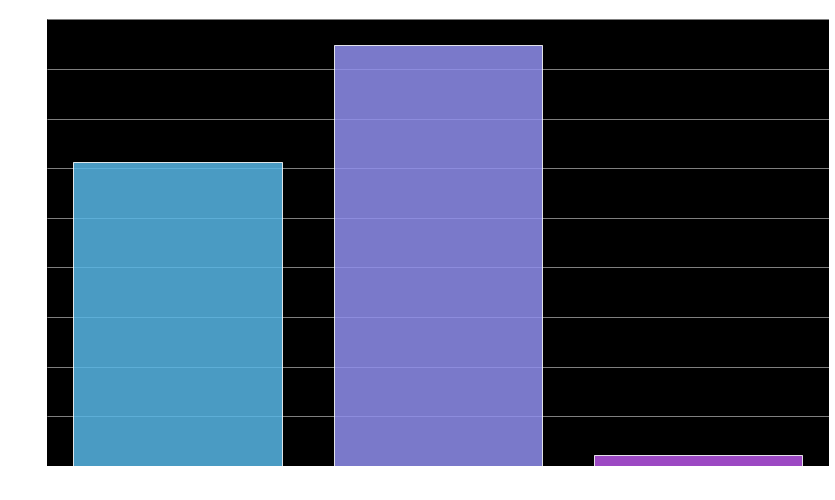

In [31]:
plot_init()
sns.countplot(x=profile["gender"],palette="cool",alpha=.85)
plt.title("Distribution of Gender Category")

<AxesSubplot:title={'center':'Distribution of became_member_on'}, xlabel='became_member_on', ylabel='Count'>

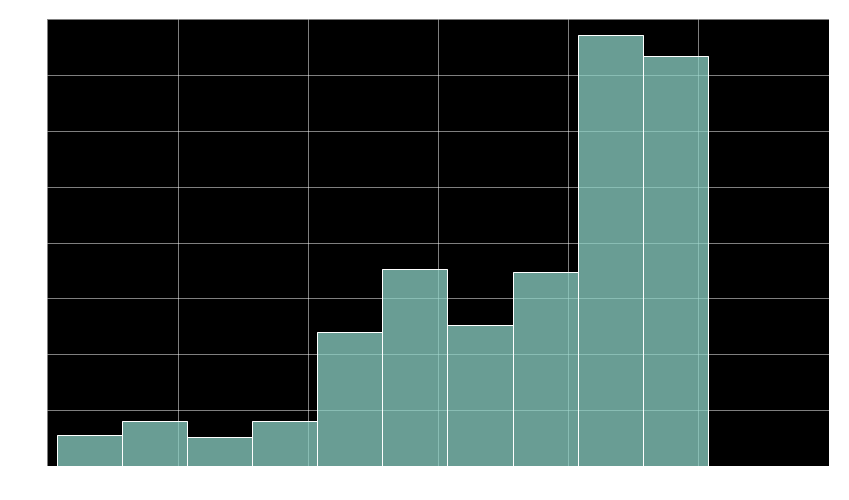

In [32]:
plot_init()
plt.title("Distribution of became_member_on")
sns.histplot(profile["became_member_on"],binwidth=5000)

<AxesSubplot:title={'center':'Scatter Plot Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1008x576 with 0 Axes>

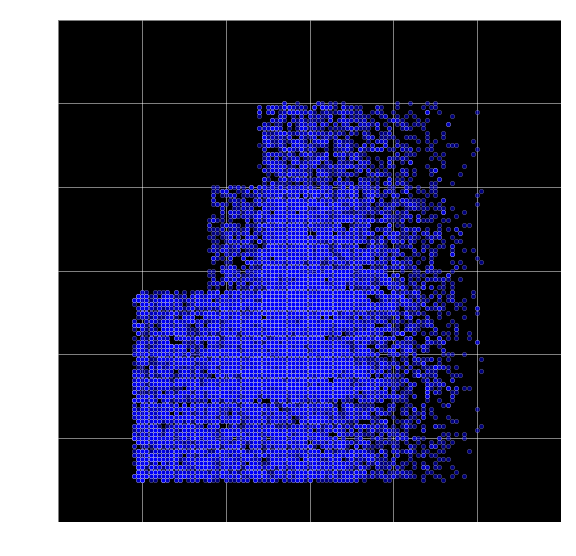

In [33]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Scatter Plot Income/Age relationship")
sns.scatterplot(x="age",y="income",data=profile, alpha=.50)


<AxesSubplot:title={'center':'Kernel Density Estimate Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1008x576 with 0 Axes>

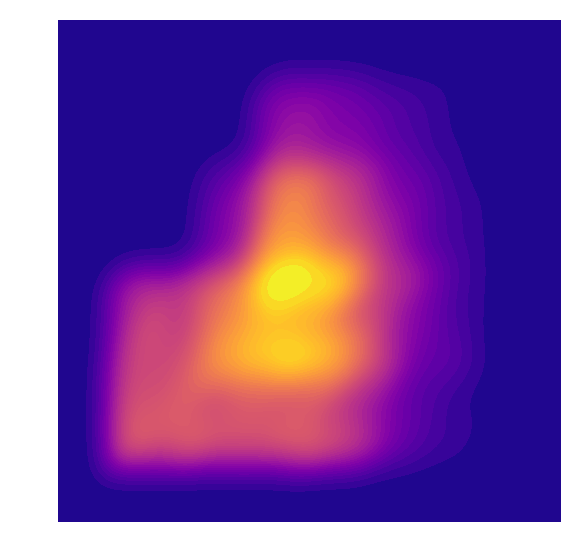

In [34]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Kernel Density Estimate Income/Age relationship")
sns.kdeplot(x="age",y="income",data=profile,cmap="plasma",fill=True,thresh=0,levels=50,legend=True)

In [35]:
np.corrcoef(profile["age"],profile["income"])

array([[1.        , 0.30670279],
       [0.30670279, 1.        ]])

<AxesSubplot:title={'center':'Polynomial Fit Income/Age relationship'}, xlabel='age', ylabel='income'>

<Figure size 1008x576 with 0 Axes>

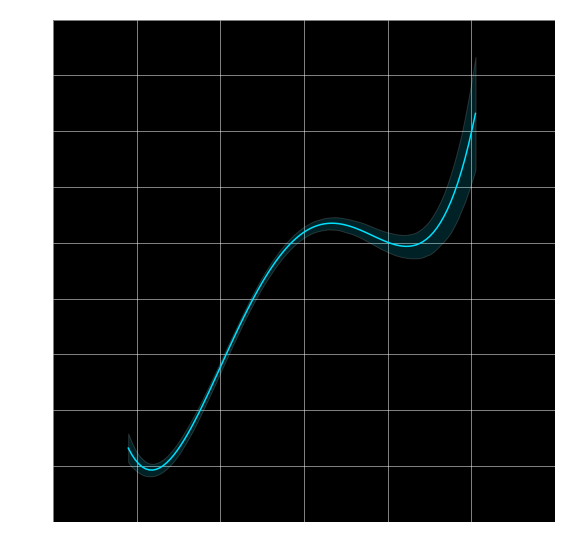

In [36]:
plot_init()
plt.figure(figsize=(9,9))
plt.title("Polynomial Fit Income/Age relationship")
sns.regplot(x="age",y="income",order=4,data=profile,scatter=False,color="#00e1ff")

C:\Users\5502\AppData\Local\Temp\ipykernel_15764\837664070.py:1: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  d = sns.displot(x="income", multiple="stack", hue="gender",data=profile, height=8, kind="kde",palette=["#fa00e5","#001eff"])


Text(0.5, 5.800000000000011, 'Income')

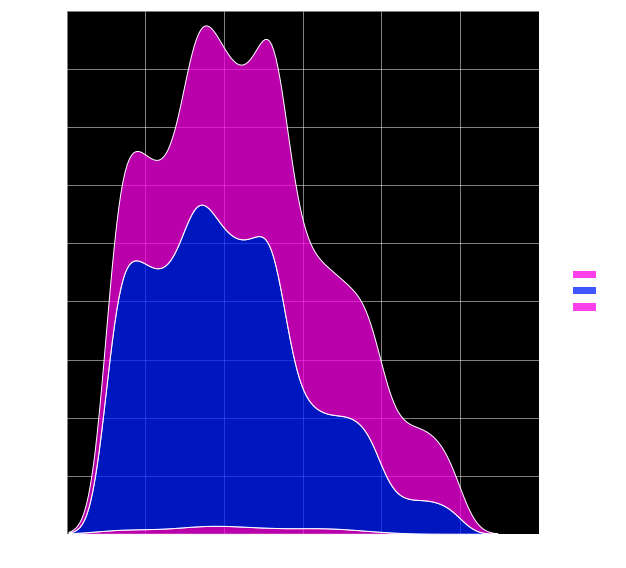

In [37]:
d = sns.displot(x="income", multiple="stack", hue="gender",data=profile, height=8, kind="kde",palette=["#fa00e5","#001eff"])
axes=d.axes.flatten()
axes[0].set_xlabel('Income')


Text(0.5, 5.800000000000011, 'Age')

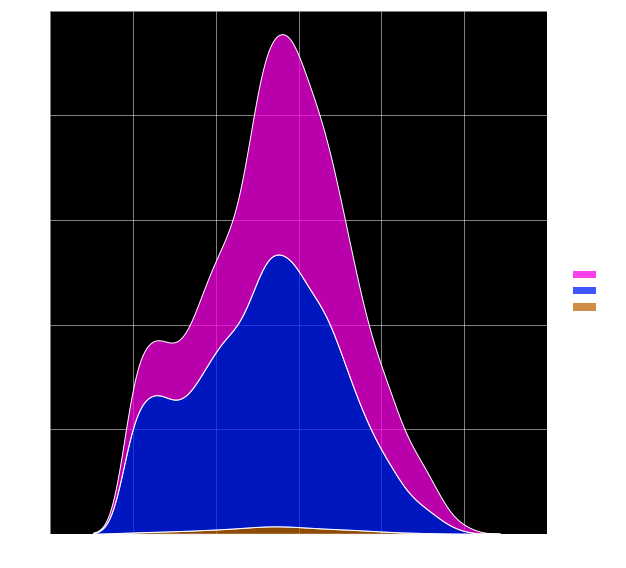

In [38]:
d = sns.displot(x="age", multiple="stack", hue="gender",data=profile, height=8, kind="kde", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Age')

Text(0.5, 5.800000000000011, 'Age')

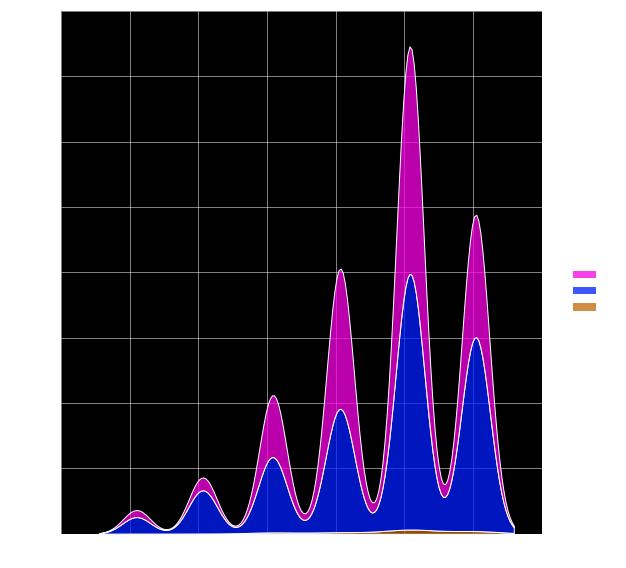

In [39]:
d = sns.displot(x="became_member_on", multiple="stack", hue="gender",data=profile, height=8, kind="kde", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Age')

In [40]:
#creating age categories
age_cat_array=[]
for i in range(len(profile)):
    retr_age = profile["age"].iloc[i]
    if retr_age>=18 and retr_age<=25:
        age_cat_array.append("18-25")
    elif retr_age>=26 and retr_age<=30:
        age_cat_array.append("26-30")
    elif retr_age>=31 and retr_age<=40:
        age_cat_array.append("31-40")
    elif retr_age>=41 and retr_age<=50:
        age_cat_array.append("41-50")
    elif retr_age>=51 and retr_age<=59:
        age_cat_array.append("51-59")
    elif retr_age>=60:
        age_cat_array.append(">60")
    



In [41]:
profile["age"]=age_cat_array

In [42]:
profile["income"].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

In [43]:
income_cat_array = []
for i in range(len(profile)):
    retr_inc = profile["income"].iloc[i]
    if retr_inc>=30000 and retr_inc<=45000:
        income_cat_array.append("30000-45000")
    elif retr_inc>=46000 and retr_inc<=55000:
        income_cat_array.append("46000-55000")
    elif retr_inc>=56000 and retr_inc<=65000:
        income_cat_array.append("56000-65000")
    elif retr_inc>=66000 and retr_inc<=79000:
        income_cat_array.append("66000-75000")
    elif retr_inc>=80000:
        income_cat_array.append(">80000")
    else:
        print(f"ERROR: on value {retr_inc} position {i}")

In [44]:
profile["income_group"]=income_cat_array

In [45]:
profile

,gender,age,id,became_member_on,income,income_group
1,F,51-59,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,>80000
3,F,>60,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,>80000
5,M,>60,e2127556f4f64592b11af22de27a7932,20180426,70000.0,66000-75000
8,M,>60,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,46000-55000
12,M,51-59,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,46000-55000
...,...,...,...,...,...,...
16995,F,41-50,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,46000-55000
16996,M,>60,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,66000-75000
16997,M,41-50,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,66000-75000
16998,F,>60,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,46000-55000


In [46]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


<AxesSubplot:title={'center':'Distribution of Offer Type'}, xlabel='offer_type', ylabel='count'>

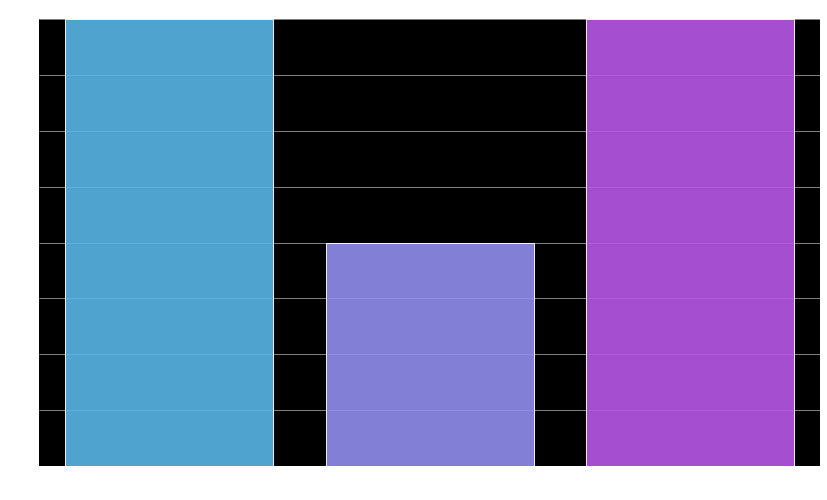

In [47]:
plot_init()
plt.title("Distribution of Offer Type")
sns.countplot(x=portfolio["offer_type"],palette="cool",alpha=.9)


<AxesSubplot:title={'center':'Distribution of Offer Duration(days)'}, xlabel='duration', ylabel='count'>

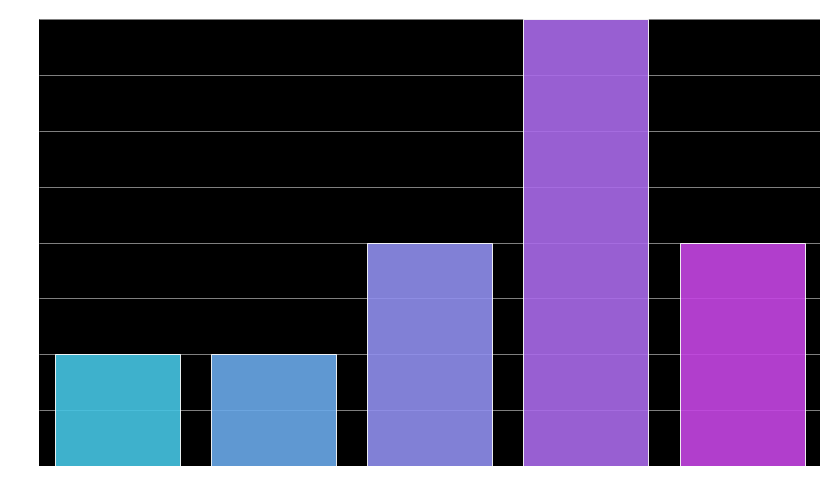

In [48]:
plot_init()
plt.title("Distribution of Offer Duration(days)")
sns.countplot(x=portfolio["duration"],palette="cool",alpha=.9)


<AxesSubplot:title={'center':'Distribution of Offer Difficulty'}, xlabel='difficulty', ylabel='count'>

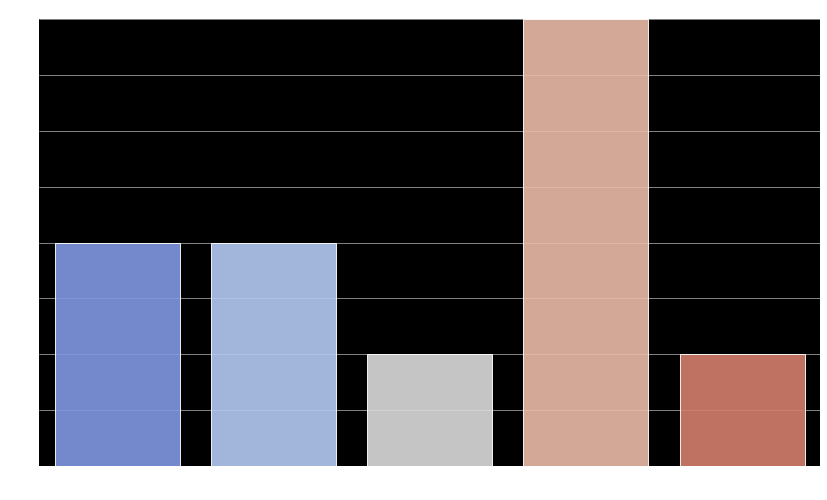

In [49]:
plot_init()
plt.title("Distribution of Offer Difficulty")
sns.countplot(x=portfolio["difficulty"], palette="coolwarm", alpha=.9)

<AxesSubplot:title={'center':'Distribution of Offer Reward'}, xlabel='reward', ylabel='count'>

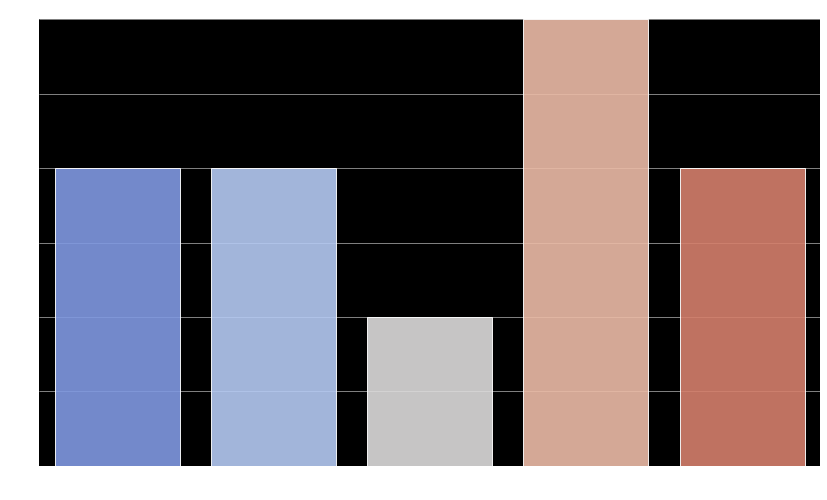

In [50]:
plot_init()
plt.title("Distribution of Offer Reward")
sns.countplot(x=portfolio["reward"], palette="coolwarm", alpha=.9)

<AxesSubplot:title={'center':'difficulty/reward relationship'}, xlabel='difficulty', ylabel='reward'>

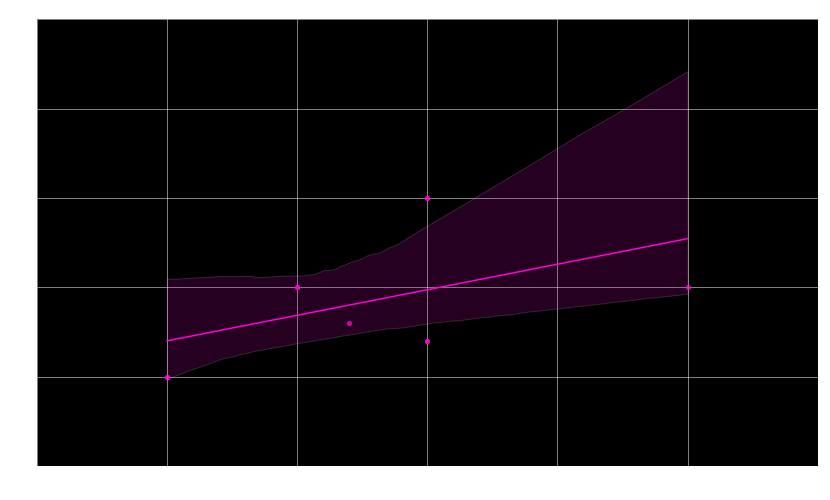

In [51]:
plot_init()
plt.title("difficulty/reward relationship")
sns.regplot(x="difficulty",y="reward", data=portfolio, color="#ff00d9")

<AxesSubplot:title={'center':'difficulty/duration relationship'}, xlabel='difficulty', ylabel='duration'>

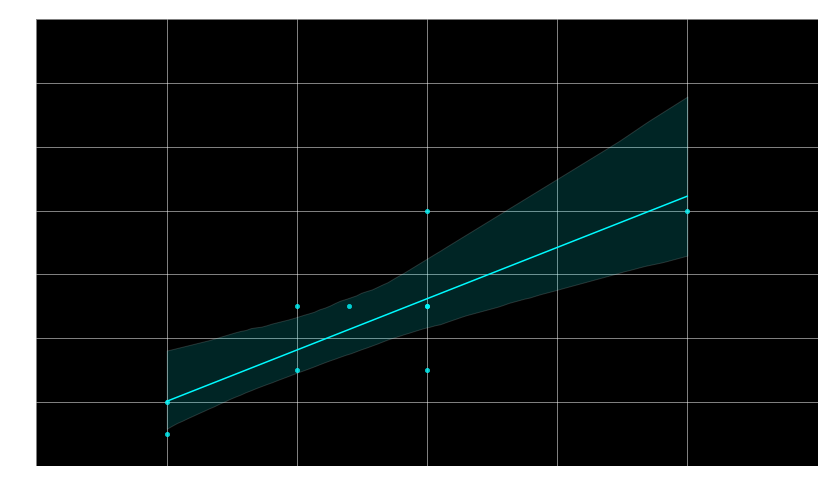

In [52]:
plot_init()
plt.title("difficulty/duration relationship")
sns.regplot(x="difficulty",y="duration", data=portfolio, color="#00fbff")

<AxesSubplot:title={'center':'duration/reward relationship'}, xlabel='duration', ylabel='reward'>

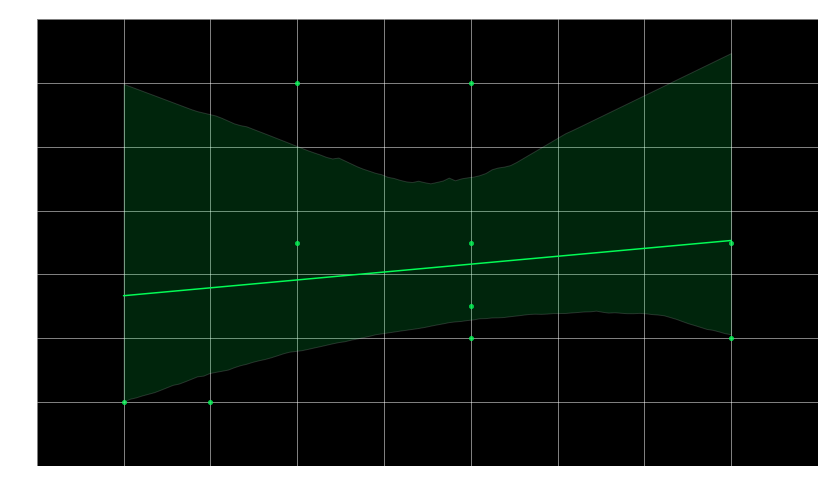

In [53]:
plot_init()
plt.title("duration/reward relationship")
sns.regplot(x="duration",y="reward", data=portfolio, color="#03fc56")

In [54]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


<AxesSubplot:title={'center':'Bar plot offer_type/duration'}, xlabel='offer_type', ylabel='duration'>

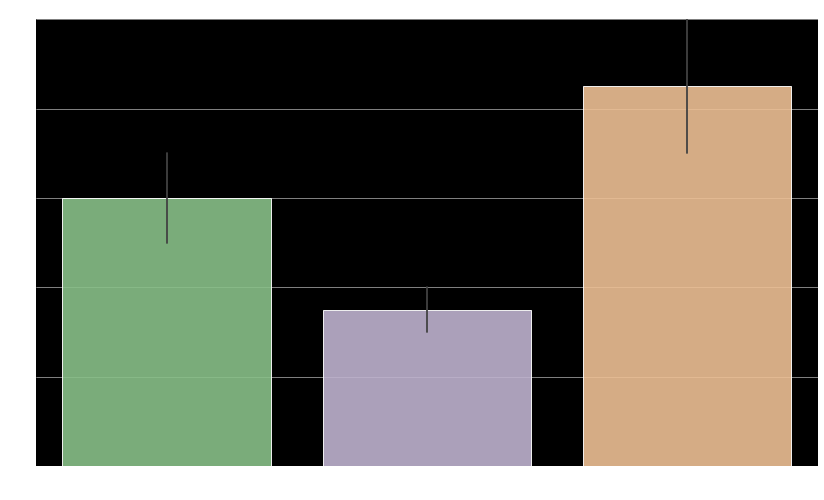

In [55]:
plot_init()
plt.title("Bar plot offer_type/duration")
sns.barplot(x="offer_type",y="duration",data=portfolio,palette="Accent",alpha=0.9)

<AxesSubplot:title={'center':'Bar plot offer_type/reward'}, xlabel='offer_type', ylabel='reward'>

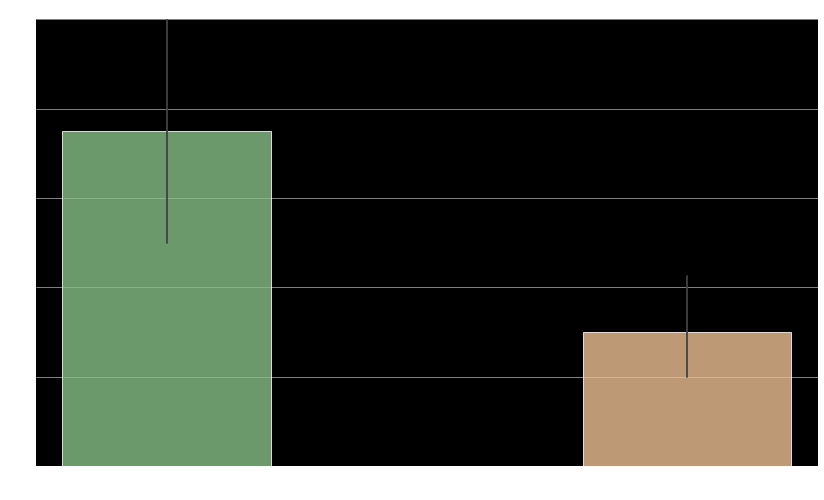

In [56]:
plot_init()
plt.title("Bar plot offer_type/reward")
sns.barplot(x="offer_type",y="reward",data=portfolio, palette="Accent", alpha=.8)

<AxesSubplot:title={'center':'Bar plot offer_type/difficulty'}, xlabel='offer_type', ylabel='difficulty'>

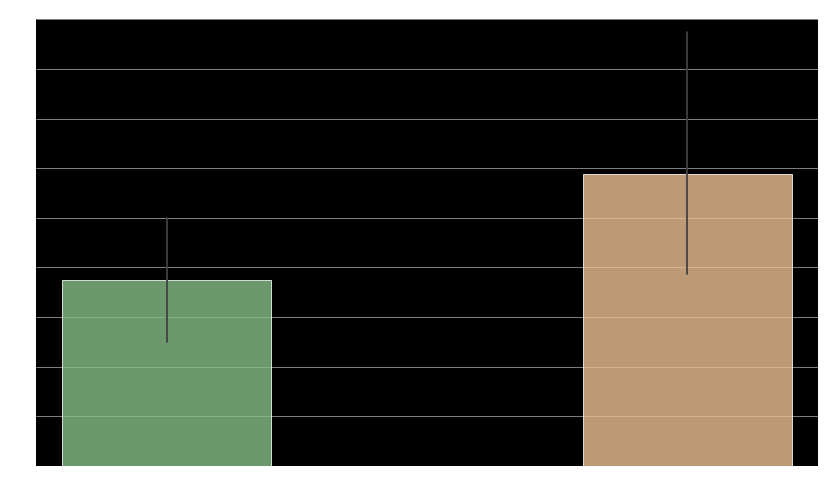

In [57]:
plot_init()
plt.title("Bar plot offer_type/difficulty")
sns.barplot(x="offer_type",y="difficulty",data=portfolio, palette="Accent", alpha=.8)

In [58]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [59]:
dum=pd.get_dummies(portfolio['channels'].explode())
portfolio = pd.concat([portfolio, dum.groupby(level=0).sum()], axis=1).drop('channels', axis=1)

In [60]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [61]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [62]:
transcript[transcript["event"]=="offer completed"].iloc[0]

person                     9fa9ae8f57894cc9a3b8a9bbe0fc1b2f
event                                       offer completed
value     {'offer_id': '2906b810c7d4411798c6938adc9daaa5...
time                                                      0
Name: 12658, dtype: object

In [63]:
clvals=[]
for i in range(len(transcript)):
    row=transcript["value"][i]
    event = transcript["event"][i]
    if event=="offer received" or event=="offer viewed" or event=="offer completed":
        try:
            r = row["offer id"]
        except:
            r = row["offer_id"]
    elif event=="transaction":
        r = row["amount"]
    
    clvals.append(r)
    

In [64]:
tt=transcript.drop("value",axis=1)
tt["value"]=clvals
transcript=tt

In [65]:
transcript

,person,event,time,value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53


In [66]:
transcript[transcript["event"]=="transaction"]["value"].mean()

12.77735615639814

In [67]:
transcript[transcript["event"]=="transaction"]["value"].min()

0.05

In [68]:
transcript[transcript["event"]=="transaction"]["value"].median()

8.89

In [69]:
transcript[transcript["event"]=="transaction"]["value"].max()

1062.28

<AxesSubplot:title={'center':'Transactions price amount distribution (log scale)'}, xlabel='value', ylabel='Count'>

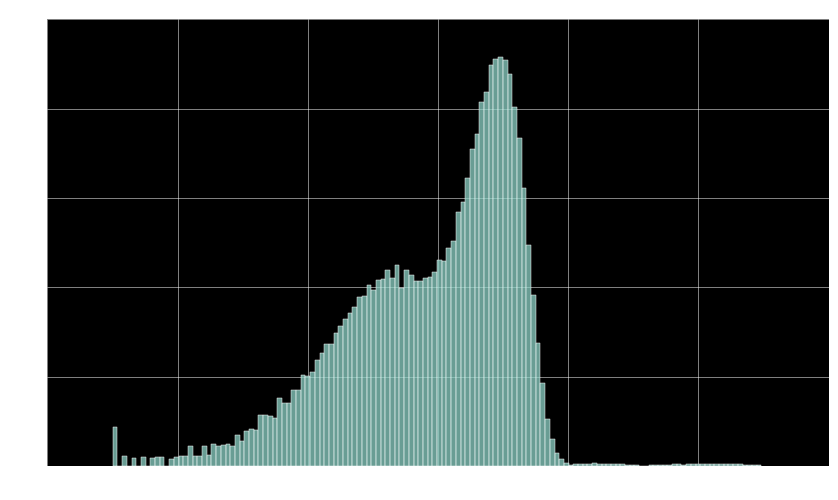

In [70]:
plot_init()
plt.title("Transactions price amount distribution (log scale)")
sns.histplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')))


<AxesSubplot:title={'center':'Transactions price amount distribution (log scale)'}, xlabel='value', ylabel='Density'>

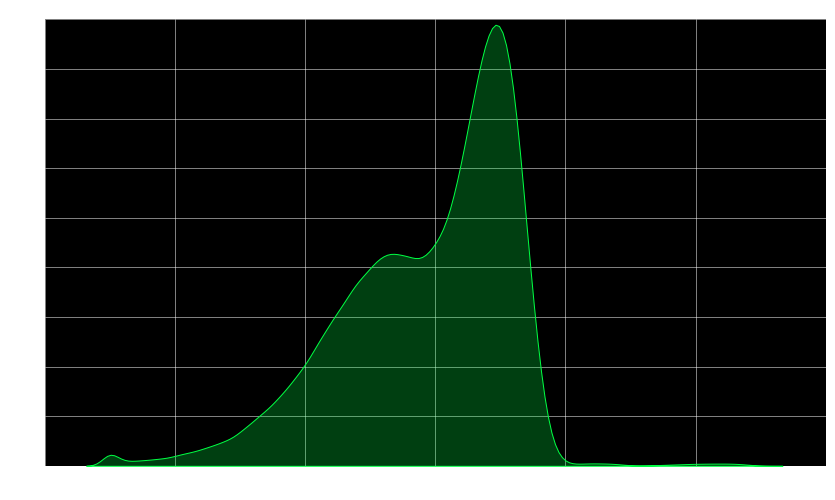

In [71]:
plot_init()
plt.title("Transactions price amount distribution (log scale)")
sns.kdeplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')), fill=True, color="#00ff44")

<AxesSubplot:xlabel='value'>

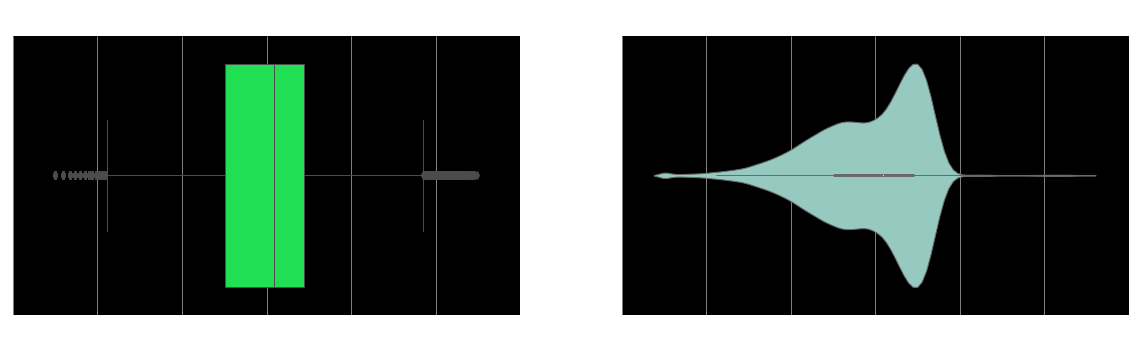

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

fig.suptitle("Transactions price amount distribution (log scale)", size=15)
sns.boxplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')), ax=axs[0], color="#00ff44")
sns.violinplot(x=np.log(transcript[transcript["event"]=="transaction"]["value"].astype('float64')))

In [73]:
transcript[transcript["event"]=="transaction"]["time"].mean()

381.58433427130035

In [74]:
ts_pf = transcript.merge(profile, left_on="person", right_on="id").drop("id", axis=1)

In [75]:
ts_pf

,person,event,time,value,gender,age,became_member_on,income,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,F,>60,20170509,100000.0,>80000
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78,F,>60,20170509,100000.0,>80000
...,...,...,...,...,...,...,...,...,...
272757,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,504,3f207df678b143eea3cee63160fa8bed,M,41-50,20171013,94000.0,>80000
272758,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,41-50,20171013,94000.0,>80000
272759,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,41-50,20171013,94000.0,>80000
272760,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,F,51-59,20161020,78000.0,66000-75000


In [76]:
ts_pf_trimmed_transaction=ts_pf[ts_pf["event"]=="transaction"]

In [77]:
ts_pf_trimmed_transaction["log_value"] = np.log(ts_pf_trimmed_transaction["value"].astype('float64'))

<AxesSubplot:title={'center':'Events occurence grouped by customer gender'}, xlabel='event', ylabel='count'>

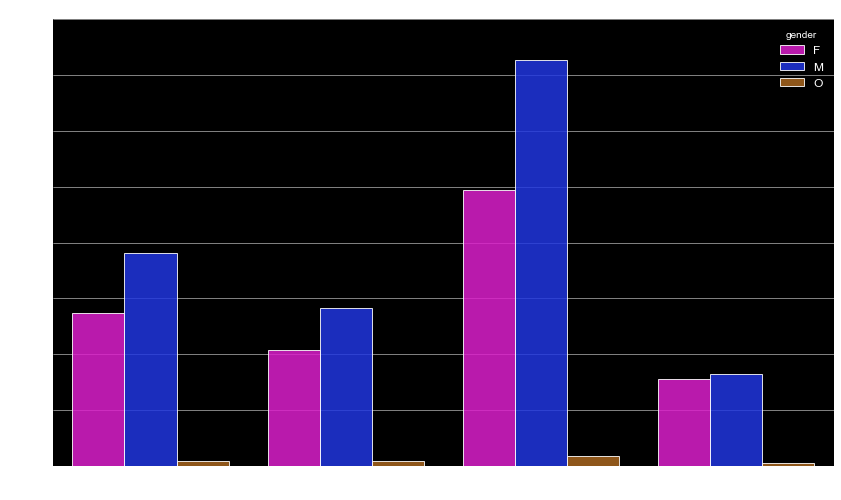

In [78]:
plot_init()
plt.title("Events occurence grouped by customer gender")
sns.countplot(x="event", hue="gender", data=ts_pf, palette=["#fa00e5","#001eff","#bf6708"],alpha=.85) 

Text(0.5, 5.800000000000011, 'Transaction Amount (log scale)')

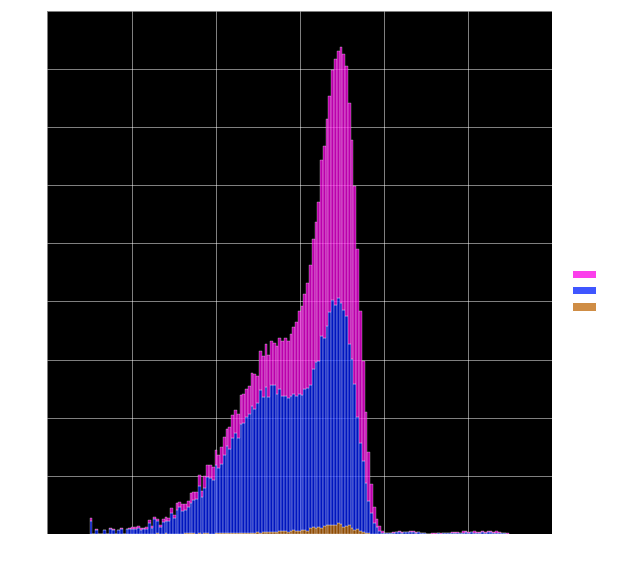

In [79]:
d = sns.displot(x="log_value", multiple="stack", hue="gender",data=ts_pf_trimmed_transaction, height=8, kind="hist", palette=["#fa00e5","#001eff","#bf6708"])
axes = d.axes.flatten()
axes[0].set_xlabel('Transaction Amount (log scale)')

<AxesSubplot:title={'center':'Events occurence grouped by customer income group'}, xlabel='event', ylabel='count'>

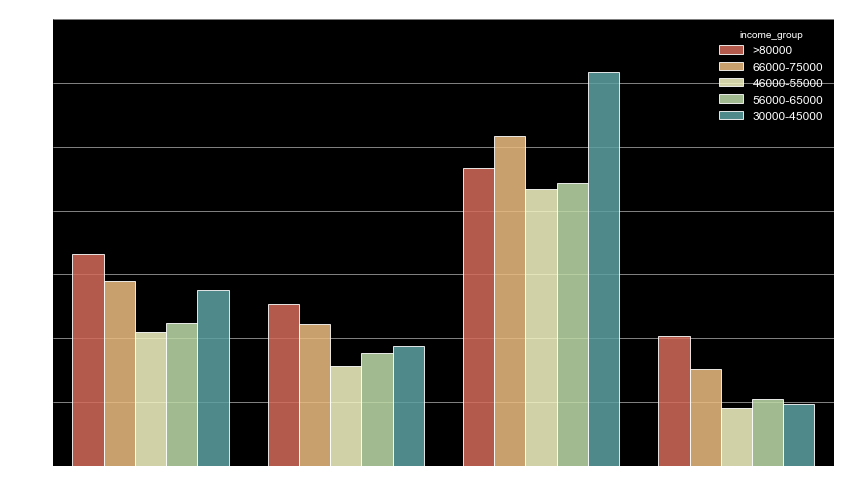

In [80]:
plot_init()
plt.title("Events occurence grouped by customer income group")
sns.countplot(x="event", hue="income_group", data=ts_pf, alpha=.85, palette="Spectral")

Text(0.5, 5.800000000000011, 'Transaction Amount (log scale)')

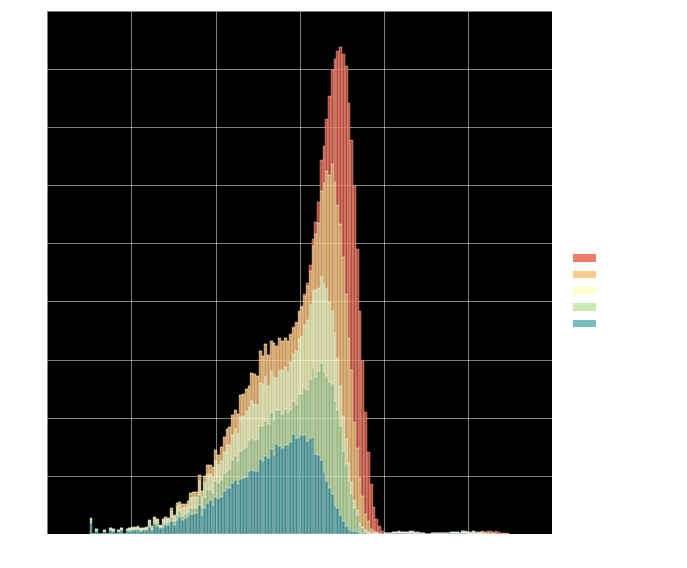

In [81]:
d = sns.displot(x="log_value", multiple="stack", hue="income_group",data=ts_pf_trimmed_transaction, height=8, kind="hist", palette="Spectral", alpha=.8)
axes = d.axes.flatten()
axes[0].set_xlabel('Transaction Amount (log scale)')

People on the lowest end among income groups tend to incur the most in transactions; nonetheless, they are the cheapest spenders. It would be interesting to analyse which group generates the most money for Starbucks by examining the product between the number of transactions and the mean transaction value.

In [82]:
ts_pf_trimmed_transaction["value"] = ts_pf_trimmed_transaction["value"].astype("float64")
a = ts_pf_trimmed_transaction.groupby("income_group")["value"].count().reset_index()
a.rename(columns={"value":"transactions"},inplace=True)

In [83]:
b = ts_pf_trimmed_transaction.groupby("income_group")["value"].mean().reset_index()
b

,income_group,value
0,30000-45000,6.458926
1,46000-55000,9.310162
2,56000-65000,11.788251
3,66000-75000,16.040742
4,>80000,28.148975


In [84]:
a["value_represented"] = a["transactions"] * b["value"]
a = a.sort_values("value_represented", ascending=False)
a

,income_group,transactions,value_represented
4,>80000,23348,657222.26
3,66000-75000,25862,414845.68
2,56000-65000,22199,261687.38
1,46000-55000,21669,201741.90
0,30000-45000,30879,199445.18


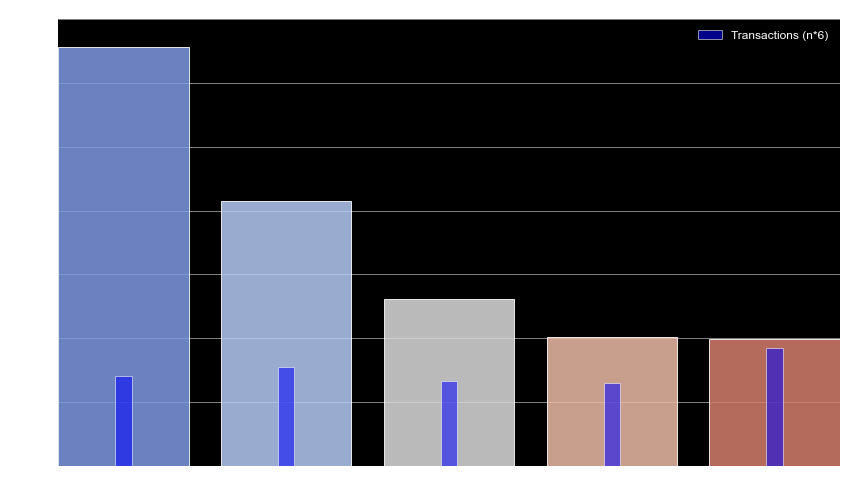

In [85]:
plot_init()
plt.title("Monetary value represented to Starbucks by income group, on average")
sns.barplot(x="income_group",y="value_represented", palette="coolwarm",data=a, alpha=.85)
plt.bar(a["income_group"],a["transactions"]*6, width=0.1, color="blue", alpha=.55, label="Transactions (n*6)")
#transactions multiplied by a factor of n*6 as this way the data is more clearly visualised on the value_represented scale
plt.legend()

 The analysis reveals that people with more money, spend more money.

Text(0, 0.5, 'Transaction Value (log)')

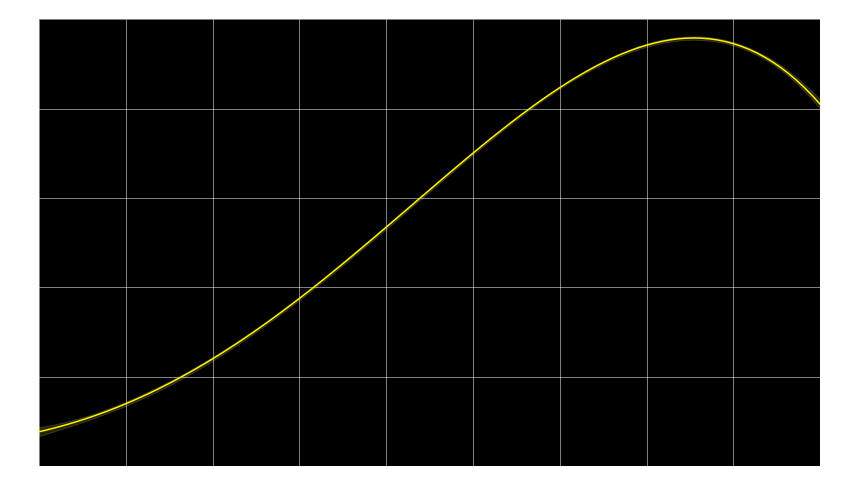

In [86]:
plot_init()
plt.title("Polynomial Trend Customer Income/Transaction Value (log)")
sns.regplot(x="income",y="log_value", data=ts_pf_trimmed_transaction, scatter=False, order=4, color="#fff200")
plt.xlabel("Customer Income")
plt.ylabel("Transaction Value (log)")

In [87]:
np.corrcoef(ts_pf_trimmed_transaction["income"],ts_pf_trimmed_transaction["log_value"])[0][1]

0.5452444199862222

In [88]:

np.corrcoef(ts_pf_trimmed_transaction["income"],ts_pf_trimmed_transaction["log_value"])[0][1]**2

0.29729147752611185

In [89]:
ts_pf_trimmed_transaction

,person,event,time,value,gender,age,became_member_on,income,income_group,log_value
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,19.89,F,>60,20170509,100000.0,>80000,2.990217
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,17.78,F,>60,20170509,100000.0,>80000,2.878074
7,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,19.67,F,>60,20170509,100000.0,>80000,2.979095
8,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,29.72,F,>60,20170509,100000.0,>80000,3.391820
9,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,23.93,F,>60,20170509,100000.0,>80000,3.175133
...,...,...,...,...,...,...,...,...,...,...
272744,47683732768a4f7db7abb710ca22e66e,transaction,684,7.10,M,18-25,20171108,56000.0,56000-65000,1.960095
272747,3873fe915496482eb589fa316ae7b0db,transaction,510,1.57,M,51-59,20170905,57000.0,56000-65000,0.451076
272750,3873fe915496482eb589fa316ae7b0db,transaction,588,1.21,M,51-59,20170905,57000.0,56000-65000,0.190620
272751,3873fe915496482eb589fa316ae7b0db,transaction,612,2.65,M,51-59,20170905,57000.0,56000-65000,0.974560


In [90]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [91]:
ts_pf_offers_portfolio=ts_pf[ts_pf["event"]!="transaction"]

In [92]:
ts_pf_offers_portfolio.rename(columns={"value": "id"}, inplace=True)
ts_pf_offers_portfolio = ts_pf_offers_portfolio.merge(portfolio)
ts_pf_offers_portfolio

,person,event,time,id,gender,age,became_member_on,income,income_group,reward,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000,5,5,7,bogo,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000,5,5,7,bogo,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,F,>60,20170509,100000.0,>80000,5,5,7,bogo,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,M,>60,20180426,70000.0,66000-75000,5,5,7,bogo,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,offer viewed,420,9b98b8c7a33c4b65b9aebfe6a799e6d9,M,>60,20180426,70000.0,66000-75000,5,5,7,bogo,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148800,8578196a074a4f328976e334fa9383a3,offer viewed,504,4d5c57ea9a6940dd891ad53e9dbe8da0,M,41-50,20180610,58000.0,56000-65000,10,10,5,bogo,1,1,1,1
148801,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,41-50,20171013,94000.0,>80000,10,10,5,bogo,1,1,1,1
148802,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,576,4d5c57ea9a6940dd891ad53e9dbe8da0,M,41-50,20171013,94000.0,>80000,10,10,5,bogo,1,1,1,1
148803,3045af4e98794a04a5542d3eac939b1f,offer received,576,4d5c57ea9a6940dd891ad53e9dbe8da0,F,51-59,20161020,78000.0,66000-75000,10,10,5,bogo,1,1,1,1


In [93]:
len(ts_pf_offers_portfolio)+len(ts_pf_trimmed_transaction)==len(ts_pf)

True

<AxesSubplot:title={'center':'Offer types grouped by customer gender'}, xlabel='offer_type', ylabel='count'>

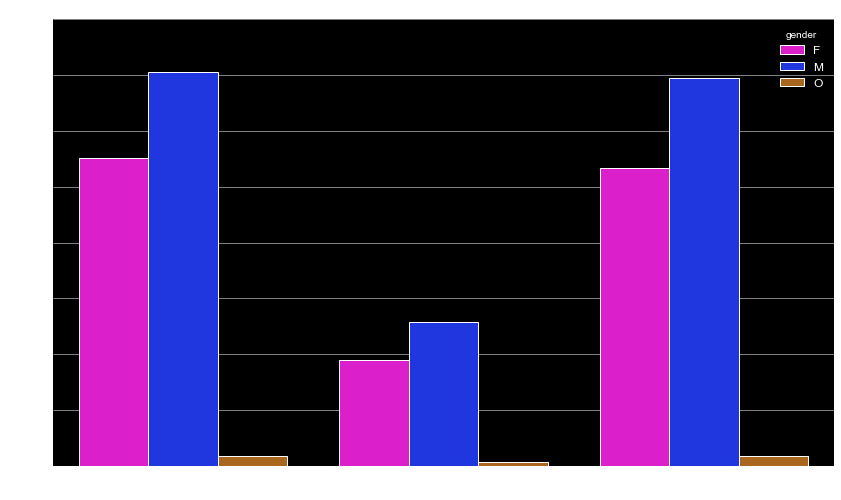

In [94]:
tpop = ts_pf_offers_portfolio
plot_init()
plt.title("Offer types grouped by customer gender")
sns.countplot(x="offer_type",hue="gender", data=tpop, palette=["#fa00e5","#001eff","#bf6708"])

In [95]:
age_group_palette_tr_natu2 = ["#f71000","#f76700","#d4ff70","#ebcb00","#20cef5","#1500ff"]


<AxesSubplot:title={'center':'Offer types grouped by customer income group'}, xlabel='offer_type', ylabel='count'>

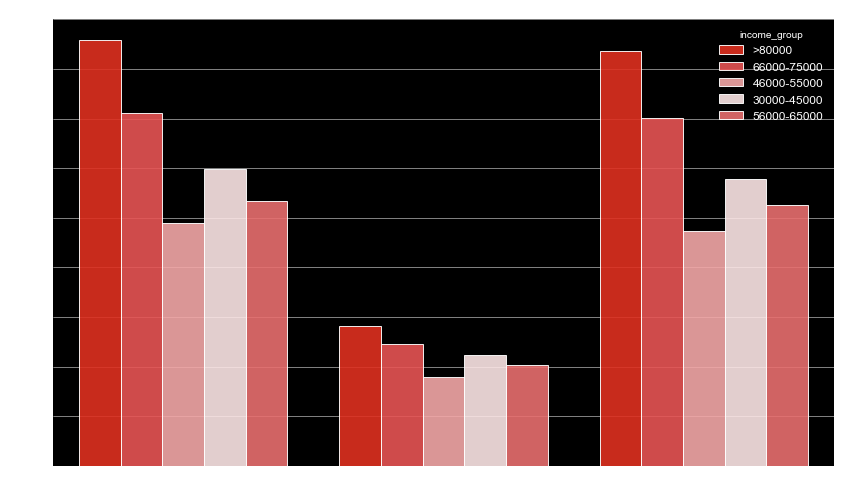

In [96]:
inc_nat_pal = ["#ff1500","#ff3b3b","#ff9c9c","#ffe3e3","#fc5b5b"]
plot_init()
plt.title("Offer types grouped by customer income group")
sns.countplot(x="offer_type",hue="income_group", data=tpop, palette=inc_nat_pal, alpha=.9)

(0.0, 714.0)

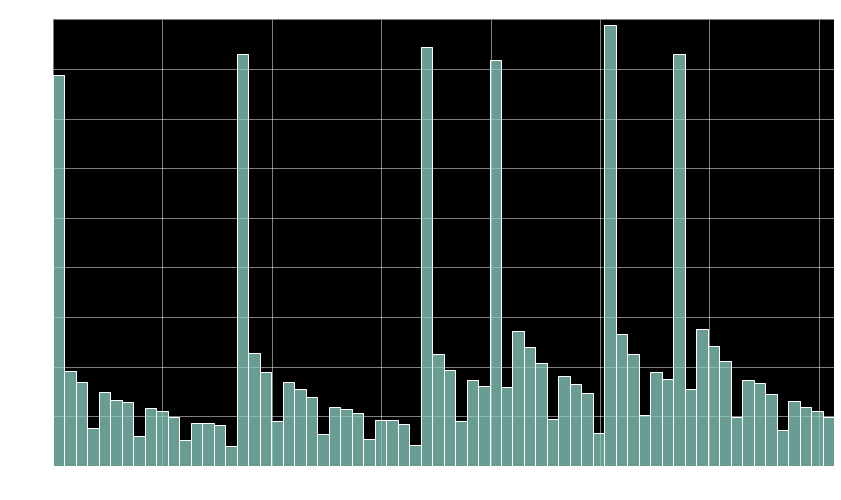

In [97]:
plot_init()
plt.title("Transcript Offer Time Histogram")
sns.histplot(ts_pf["time"])
plt.xlabel("Time (Hs)")
plt.xlim(0,714)